In [109]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import svm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [110]:
data = pd.read_csv('data.csv') #reading the file

In [111]:
data


,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [112]:
data.dtypes #checking the data types

x1    float64
x2    float64
y       int64
dtype: object

In [113]:
#Performing Exploatory data analysis
data.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [114]:
data.tail()

,x1,x2,y
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0
2226,109.624009,1.000000e+08,0


In [115]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [116]:
data.isnull() #checking for missing values

,x1,x2,y
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2222,False,False,False
2223,False,False,False
2224,False,False,False
2225,False,False,False


In [117]:
data.isnull().sum() #total number of null values 

x1    5
x2    3
y     0
dtype: int64

In [118]:
data1 = data.fillna(method = 'pad') #filling the null values using the beforefill method which fills in the missing values with the previous value

In [119]:
data1

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [120]:
data1.isnull().sum() #the missing values have been filled

x1    0
x2    0
y     0
dtype: int64

In [121]:
data1.describe() #The data insight is given below.

,x1,x2,y
count,2227.000000,2.227000e+03,2227.000000
mean,-4.788406,8.935573e+04,0.442299
std,74.951439,2.981313e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.713542,-8.025966e+01,0.000000
50%,-9.750840,-1.000000e+00,0.000000
75%,59.753752,6.390448e+01,1.000000
max,134.508687,1.000000e+08,1.000000


C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


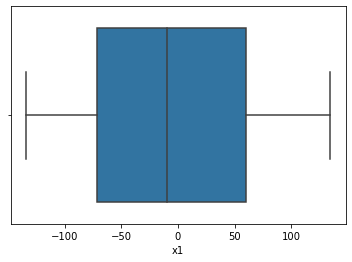

In [122]:
sns.boxplot(data.x1)
plt.show()  #Outliers visualization using boxplot in X1

C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


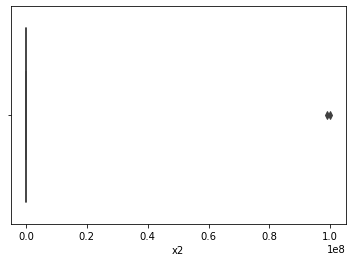

In [123]:
sns.boxplot(data.x2)
plt.show()  #Outliers visualization using boxplot in X2

C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


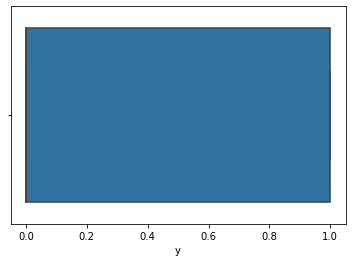

In [124]:
sns.boxplot(data.y)
plt.show()  #Outliers visualization using boxplot in y

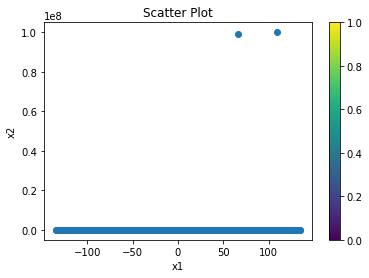

In [125]:
plt.title("Scatter Plot") #Visualization through scatter plot
  
plt.scatter(data1['x1'], data1['x2'])
# Setting the X and Y labels
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()  
plt.show()


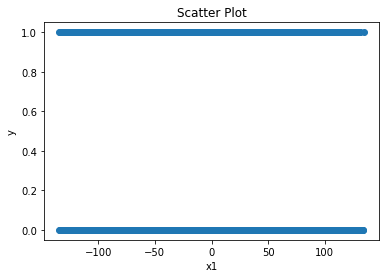

In [126]:
plt.title("Scatter Plot") #Visualization through scatter plot
  
plt.scatter(data1['x1'], data1['y'])
# Setting the X and Y labels
plt.xlabel('x1')
plt.ylabel('y')
  
plt.show()

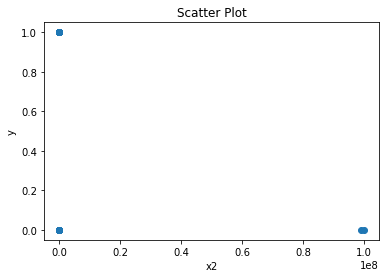

In [127]:
plt.title("Scatter Plot") #Visualization through scatter plot
  
plt.scatter(data1['x2'], data1['y'])
# Setting the X and Y labels
plt.xlabel('x2')
plt.ylabel('y')
  
plt.show()

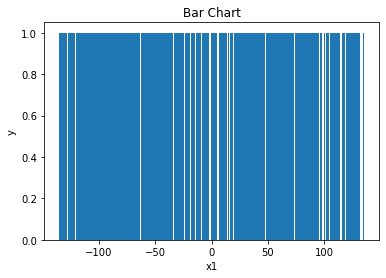

In [128]:

plt.bar(data1['x1'], data1['y'])
  
plt.title("Bar Chart")
  
# Setting the X and Y labels
plt.xlabel('x1')
plt.ylabel('y')
  
plt.show()

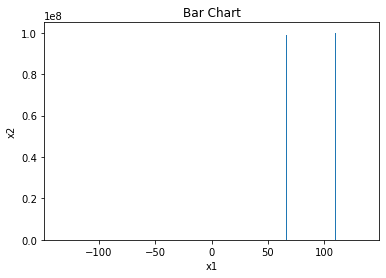

In [129]:
plt.bar(data1['x1'], data1['x2'])
  
plt.title("Bar Chart")
  
# Setting the X and Y labels
plt.xlabel('x1')
plt.ylabel('x2')
  
plt.show()

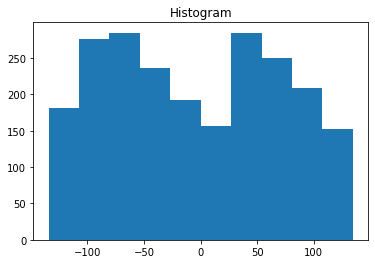

In [130]:

plt.hist(data['x1'])
  
plt.title("Histogram")
  
# Adding the legends
plt.show()

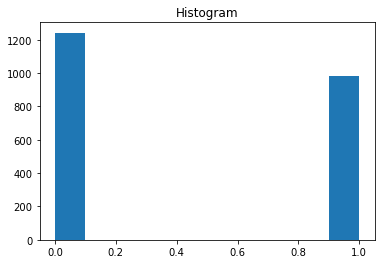

In [131]:
 
plt.hist(data['y'])
  
plt.title("Histogram")
  
# Adding the legends
plt.show()

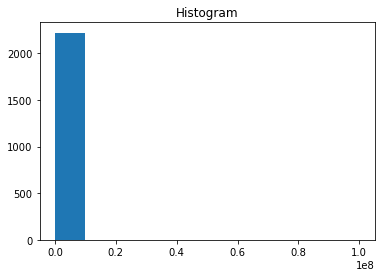

In [132]:

plt.hist(data['x2'])
  
plt.title("Histogram")
  
# Adding the legends
plt.show()

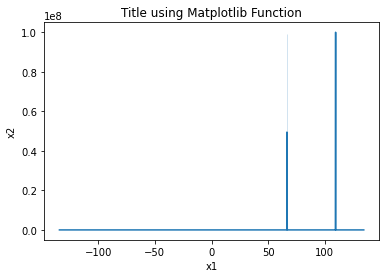

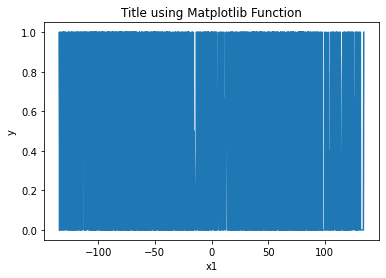

In [ ]:
 #draw lineplot
sns.lineplot(x="x1", y="x2", data=data1)
  

plt.title('Title using Matplotlib Function')
  
plt.show()
#draw lineplot
sns.lineplot(x="x1", y="y", data=data1)
  

plt.title('Title using Matplotlib Function')
  
plt.show()
#draw lineplot
sns.lineplot(x="x2", y="y", data=data1)
  

plt.title('Title using Matplotlib Function')
  
plt.show()

In [ ]:
#building a  logistic regression model
x = data1.iloc[:,[2]].values # input
y = data1.iloc[:,[0,1]].values #output



In [ ]:
from sklearn.preprocessing import StarndardScaler
sc_x = StandardScaler()
xtrain= sc_x.fit_tranfrom(x_train)
xtest = sc_x.transform(xtest)
print(xtrain[0:20, :])

In [ ]:
from sklearn.cross_validation import train_test_split
xtrain,xtest,ytrain,ytest =train_test_spilt(x,y,test_size =0.25,random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain,ytrain)


In [ ]:
y_pred =classifier.predict(xtest)

In [ ]:
from sklearn.metrices import confusion_matrix
cm = confusion_matrix(ytest,y_pred)
print("CM",cm)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy ", accuracy_score(ytest, y_pred))

In [ ]:
from sklearn.metrices.colors import ListedColormap
X_set ,y_set =x_test,ytest
X1,X2 =np_meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
      
plt.title('Classifier (Test set)')
plt.xlabel('X1')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
# SVM with linear kernel

C = 1.0 
X = data1.iloc[:,[2]].values
y = data1.iloc[:,[1]].values


  

svc = svm.SVC(kernel ='linear', C = 1).fit(X, y)
  

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
         np.arange(y_min, y_max, h))
  

plt.subplot(1, 1, 1)
  

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
  
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
  
# Output the Plot
plt.show()

In [ ]:
#Decision tree


def splitdataset(balance_data):
  

    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]
  
 
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test
      

def train_using_gini(X_train, X_test, y_train):
  
    
          clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
 
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
   
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  

def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
  

def main():
      
   
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
    

    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      

    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      

if __name__=="__main__":
    main()
    

In [ ]:
#KNN 

X = data1.x1
y = data1.x2
 

X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
 
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
 

print(knn.predict(X_test))


# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
 
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
 
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))



for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
#The data given was read,under exploratory data analysis was preformed under which head,tail ,info were checked later  missing values were checked and filled using the fucntion previous,data set was changed to data1,then vidualziations were done to predict the outliers .the model logistic regression,SVM ,decision tree and KNN were modelled and checked for performance metrices .After shich the decision tree model was most accurate than the rest.